## Data cleaning

Data cleaning is something data scientists spend a lot of time on. The problem with teaching data cleaning is that the problems you will face are incredibly diverse. In this Notebook you will just see a few issues. Excellent (much better, to be honest) overviews can be found [here](https://realpython.com/python-data-cleaning-numpy-pandas/) or [here](https://www.tutorialspoint.com/python/python_data_cleansing.htm). This Notebook will contain most information you will need for the first Assignment, however.

Let's start with a common situation you might face: you have data that are distributed among two files. I'm using a selection from a data set on [Google Play apps](https://www.kaggle.com/lava18/google-play-store-apps/home). 

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('googleplay_part1.csv')
df1.head()


,app,reviews,rating
0,JailBase - Arrests + Mugshots,17240,NaN
1,EF Smart English for Phone,208,/
2,CP Calculator,187,4.1
3,Workout Tracker & Gym Trainer - Fitness Log Book,5420,4.6
4,All Language Translator,29944,4


In [2]:
df2 = pd.read_csv('googleplay_part2.csv')
df2.head()

,app,size,price
0,JailBase - Arrests + Mugshots,NaN,0.0
1,EF Smart English for Phone,13.0,0.0
2,CP Calculator,2.9,0.0
3,Workout Tracker & Gym Trainer - Fitness Log Book,21.0,0.0
4,All Language Translator,2.1,0.0


As we can see, the two files share an identifier variable, *app*. You can join two dataframes using the Pandas `merge` function.

In [3]:
df = pd.merge(df1, df2, on = 'app') #'app' is the common identifier
df.head()

,app,reviews,rating,size,price
0,JailBase - Arrests + Mugshots,17240,NaN,NaN,0.0
1,EF Smart English for Phone,208,/,13.0,0.0
2,CP Calculator,187,4.1,2.9,0.0
3,Workout Tracker & Gym Trainer - Fitness Log Book,5420,4.6,21.0,0.0
4,All Language Translator,29944,4,2.1,0.0


Some problems are already apparent with this small snapshot of the data: missing values (NaN) and a possible data entry error ("/" for the rating for case 1). However, with big data files we will need to validate our data a lot better. There are a few functions that are handy to get a grip on the data.

In [4]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 5 columns):
app        499 non-null object
reviews    499 non-null int64
rating     420 non-null object
size       424 non-null float64
price      499 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 23.4+ KB


It is already apparent that `reviews`, and `ratings` are not numeric, though they should be given the nature of the data. Let's focus on ratings and try to clean that variable

In [5]:
df['rating'].value_counts() #Get all the values. This may be less useful when there are many values.

4.4    48
4.2    44
4.3    44
4.5    42
4.6    36
4.7    34
4.1    33
4      31
3.9    17
5      15
3.8    12
3.7     8
4.8     8
3.6     6
3.5     6
3.4     5
4.9     5
3.3     4
2.9     3
3.1     3
1.9     2
3.2     2
3       2
1       2
5.3     1
2.2     1
1.6     1
5.9     1
2.1     1
2.5     1
/       1
2.7     1
Name: rating, dtype: int64

There are three values that are problematic: the "/" we already discovered, and two ratings that are above 5.0. Let's create a new column that excludes them.

In [6]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['rating'] = df['rating'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def above_5(x):
    if(x > 5.0): 
        return float('NaN')
    else: 
        return x
df['rating'] = df['rating'].apply(above_5)


Finally, we can make a plot of ratings:

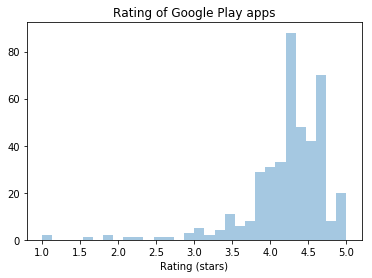

In [7]:
sns.distplot(df['rating'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Rating of Google Play apps')
plt.xlabel('Rating (stars)')
plt.show()

This might seem like a lot of work that could be done much more easily in something like Excel. But there are  advantages going "the hard way":

* Your analysis is reproducible: everything is transparent, no fear of losing track of your steps.
* It works on very big data sets too.
